## Projeto de Data Mining - Análise de Investimentos em ações e fundos do mercado Brasileiro

In [1]:
# Entendemos que o dataset estava inconpleto e optamos por criar uma automação para buscar as seguintes informações, através de web scrapping:
# 'CÓDIGO', 'TIPO', 'SETOR', 'COTAÇÃO ATUAL', 'MÍNIMA', 'MÁXIMA', 'D/Y', 'LIQ.DIÁRIA', 'P/VP', 'CAGR LUCRO', 'PATRIMÔNIO LÍQUIDO', 'CAIXA', 'LUCRO'])

'''#código automação ações part 1
from selenium import webdriver
from time import sleep as sl
import pandas as pd
import pyautogui as py
#a biblioteca selenium fará a parte da automação juntamente com a biblioteca pyautogui

#a biblioteca sleep faz o código ter um delay, é útil para quando um site demora para carregar, já que esse delay pode nos 
#prevenir de erros desnecessários do programa por causa dessa demora

#a biblioteca pandas nos serviu na criação de DataFrames e na leitura de arquivos em excel pelo python

df = pd.read_excel('statusinvest-busca_acoes.xlsx')
#planilha em excel adquirida por meio do site statusinvest, no qual nos fornece-a gratuitamente 
display(df)
# df será a variável que terá nosso DataFrame'''


"#código automação ações part 1\nfrom selenium import webdriver\nfrom time import sleep as sl\nimport pandas as pd\nimport pyautogui as py\n#a biblioteca selenium fará a parte da automação juntamente com a biblioteca pyautogui\n\n#a biblioteca sleep faz o código ter um delay, é útil para quando um site demora para carregar, já que esse delay pode nos \n#prevenir de erros desnecessários do programa por causa dessa demora\n\n#a biblioteca pandas nos serviu na criação de DataFrames e na leitura de arquivos em excel pelo python\n\ndf = pd.read_excel('statusinvest-busca_acoes.xlsx')\n#planilha em excel adquirida por meio do site statusinvest, no qual nos fornece-a gratuitamente \ndisplay(df)\n# df será a variável que terá nosso DataFrame"

In [2]:
'''#código automação ações part 2
#AÇÕES
navegador = webdriver.Chrome()
navegador.get('https://www.google.com')
link = 'https://statusinvest.com.br/'
navegador.get(link)
print(link)
#as funcões acima servem para o selenium entrar no site statusinvest, onde tiraremos nossas informações

py.keyDown('win')
py.press('up')
py.keyUp('win')

nome = []
setor = []
cot_atual = []
dy = []
pvp  = []
cagr = []
liqdia = []
caixa = []
maxima = []
minima = []
patliq = []
tipo = []
lucro = []
#estas listas acima são todas as informações que pegaremos do site, nas quais serão transformadas em um DataFrame depois

for c in df['TICKER']:
    #Looping 'for' para pegar cada ticker(código) das ações no DataFrame 
    nome.append(c)
    navegador.find_element('xpath', '//*[@id="main-nav-nav"]/div/div/div/ul/li[2]/a/i').click()
    navegador.find_element('xpath', '//*[@id="main-search"]/div[1]/span[1]/input[2]').send_keys(c)
    try:
        sl(3.5)
        navegador.find_element('xpath', '//*[@id="main-search"]/div[2]/div/div/a').click()
    except:
        sl(2)
        navegador.find_element('xpath', '//*[@id="main-search"]/div[2]/div/div/a').click()
        
    #tratamento de erro usado aqui para prevenir erros enquanto o programa está funcionando, se houver um 
    #erro o progresso será pausado
    
    sl(1)
    tipo.append(navegador.find_element('xpath', '//*[@id="main-header"]/div[2]/div/div[1]/div/ol/li[2]/a/span').text)
    cot_atual.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div/div[1]/div/div[1]/div/div[1]/strong').text)
    maxima.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div/div[1]/div/div[3]/div/div[1]/strong').text)
    minima.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div/div[1]/div/div[2]/div/div[1]/strong').text)
    dy.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div/div[1]/div/div[4]/div/div[1]/strong').text)
    
    py.scroll(-1000)
    sl(0.5)
    liqdia.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div/div[5]/div/div/div[3]/div/div/div/strong').text)
    py.scroll(-900)
    sl(0.5)
    pvp.append(navegador.find_element('xpath', '//*[@id="indicators-section"]/div[2]/div/div[1]/div/div[4]/div/div/strong').text)
    cagr.append(navegador.find_element('xpath', '//*[@id="indicators-section"]/div[2]/div/div[5]/div/div[2]/div/div/strong').text)
    
    navegador.find_element('xpath', '//*[@id="main-2"]/div[1]/div/div/ul/li[2]/a').click()
    sl(0.5)
    py.scroll(-500)
    sl(0.5)
    patliq.append(navegador.find_element('xpath', '//*[@id="company-section"]/div[1]/div/div[2]/div[1]/div/div/strong').text)
    setor.append(navegador.find_element('xpath', '//*[@id="company-section"]/div[1]/div/div[3]/div/div[1]/div/div/div/a/strong').text)
    
    navegador.find_element('xpath', '//*[@id="main-2"]/div[1]/div/div/ul/li[3]/a').click()
    sl(1)
    py.scroll(-1300)
    sl(1)
    try:
        caixa.append(navegador.find_element('xpath', '//*[@id="contabil-section"]/div[1]/div/div[3]/div[1]/div[1]/table/tbody/tr[1]/td[2]/span').text)
        lucro.append(navegador.find_element('xpath', '//*[@id="contabil-section"]/div[1]/div/div[3]/div[1]/div[1]/table/tbody/tr[3]/td[2]/span').text)
    except:
        sl(1.5)
        caixa.append(navegador.find_element('xpath', '//*[@id="contabil-section"]/div[1]/div/div[3]/div[1]/div[1]/table/tbody/tr[1]/td[2]/span').text)
        lucro.append(navegador.find_element('xpath', '//*[@id="contabil-section"]/div[1]/div/div[3]/div[1]/div[1]/table/tbody/tr[3]/td[2]/span').text)
  
    #funções da biblioteca selenium para pegar informações do site e colocá-las em suas respectivas listas 
    #(por isso usei a função append também)'''

'#código automação ações part 2\n#AÇÕES\nnavegador = webdriver.Chrome()\nnavegador.get(\'https://www.google.com\')\nlink = \'https://statusinvest.com.br/\'\nnavegador.get(link)\nprint(link)\n#as funcões acima servem para o selenium entrar no site statusinvest, onde tiraremos nossas informações\n\npy.keyDown(\'win\')\npy.press(\'up\')\npy.keyUp(\'win\')\n\nnome = []\nsetor = []\ncot_atual = []\ndy = []\npvp  = []\ncagr = []\nliqdia = []\ncaixa = []\nmaxima = []\nminima = []\npatliq = []\ntipo = []\nlucro = []\n#estas listas acima são todas as informações que pegaremos do site, nas quais serão transformadas em um DataFrame depois\n\nfor c in df[\'TICKER\']:\n    #Looping \'for\' para pegar cada ticker(código) das ações no DataFrame \n    nome.append(c)\n    navegador.find_element(\'xpath\', \'//*[@id="main-nav-nav"]/div/div/div/ul/li[2]/a/i\').click()\n    navegador.find_element(\'xpath\', \'//*[@id="main-search"]/div[1]/span[1]/input[2]\').send_keys(c)\n    try:\n        sl(3.5)\n      

In [3]:
'''#código automação ações part 3
df = pd.DataFrame(zip(nome, tipo, setor, cot_atual, minima, maxima, dy, liqdia, pvp, cagr, patliq, caixa, lucro), columns=['CÓDIGO', 'TIPO', 'SETOR', 'COTAÇÃO ATUAL', 'MÍNIMA', 'MÁXIMA', 'D/Y', 'LIQ.DIÁRIA', 'P/VP', 'CAGR LUCRO', 'PATRIMÔNIO LÍQUIDO', 'CAIXA', 'LUCRO'])
display(df)
#função da biblioteca pandas para transformar listas em DataFrames 

df.to_excel('Análise_ações.xlsx')
#exportação do DataFrame em formato excel'''

"#código automação ações part 3\ndf = pd.DataFrame(zip(nome, tipo, setor, cot_atual, minima, maxima, dy, liqdia, pvp, cagr, patliq, caixa, lucro), columns=['CÓDIGO', 'TIPO', 'SETOR', 'COTAÇÃO ATUAL', 'MÍNIMA', 'MÁXIMA', 'D/Y', 'LIQ.DIÁRIA', 'P/VP', 'CAGR LUCRO', 'PATRIMÔNIO LÍQUIDO', 'CAIXA', 'LUCRO'])\ndisplay(df)\n#função da biblioteca pandas para transformar listas em DataFrames \n\ndf.to_excel('Análise_ações.xlsx')\n#exportação do DataFrame em formato excel"

In [4]:
'''#código automação fundos part 1

#FUNDOS
df2 = pd.read_excel('fundos_junho.xlsx')
#planilha em excel adquirida por meio do projeto em python abaixo

df2 = df2.drop(['Unnamed: 0'], axis=1)
display(df2)
# df2 será a variável que terá nosso DataFrame'''

"#código automação fundos part 1\n\n#FUNDOS\ndf2 = pd.read_excel('fundos_junho.xlsx')\n#planilha em excel adquirida por meio do projeto em python abaixo\n\ndf2 = df2.drop(['Unnamed: 0'], axis=1)\ndisplay(df2)\n# df2 será a variável que terá nosso DataFrame"

In [5]:
'''#código automação fundos part 2 

navegador = webdriver.Chrome()
navegador.get('https://www.google.com')
link = 'https://statusinvest.com.br/'
navegador.get(link)
print(link)
#as funcões acima servem para o selenium entrar no site statusinvest, onde tiraremos nossas informações

py.keyDown('win')
py.press('up')
py.keyUp('win')

codigo = []
setor = []
tipo = []
maxima = []
minima = []
cot_atual = []
dy = []
liq_dia = []
patrim = []
caixa = []
cagr = []
pvp = []
#estas listas acima são todas as informações que pegaremos do site, nas quais serão transformadas em um DataFrame depois

for c in df2['TICKER']:
    #Looping 'for' para pegar cada ticker(código) das ações no DataFrame
    codigo.append(c)
    navegador.find_element('xpath', '//*[@id="main-nav-nav"]/div/div/div/ul/li[2]/a/i').click()
    navegador.find_element('xpath', '//*[@id="main-search"]/div[1]/span[1]/input[2]').send_keys(c)
    try:
        sl(3)
        navegador.find_element('xpath', '//*[@id="main-search"]/div[2]/div/div/a').click()
        
    except:
        sl(2)
        navegador.find_element('xpath', '//*[@id="main-search"]/div[2]/div/div/a').click()
    #tratamento de erro usado aqui para prevenir erros enquanto o programa está funcionando, se houver um 
    #erro o progresso será pausado
        
    tipo.append(navegador.find_element('xpath', '//*[@id="main-header"]/div[2]/div/div[1]/div/ol/li[2]/a/span').text)
    
    cot_atual.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div[1]/div[1]/div/div[1]/strong').text)
    
    maxima.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div[1]/div[3]/div/div[1]/strong').text)
    #                                              //*[@id="main-2"]/div[2]/div[1]/div[3]/div/div[1]/strong
    
    minima.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div[1]/div[2]/div/div[1]/strong').text)
    
    dy.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div[1]/div[4]/div/div[1]/strong').text)
    
    py.scroll(-1200)
    sl(0.5)
    try:
        pvp.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div[4]/div/div[2]/div/div[1]/strong').text)
    except:
        pvp.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div[5]/div/div[2]/div/div[1]/strong').text)                                          
    
    try:
        patrim.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div[4]/div/div[1]/div/div[2]/span[2]').text)
    except:
        patrim.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div[5]/div/div[1]/div/div[2]/span[2]').text)
    try:  
        caixa.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div[4]/div/div[2]/div/div[2]/span[2]').text)
    except:
        caixa.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div[5]/div/div[2]/div/div[2]/span[2]').text)
    try:    
        cagr.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div[4]/div/div[5]/div/div[1]/strong').text)
    except:
        cagr.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div[5]/div/div[5]/div/div[1]/strong').text)
    try:    
        liq_dia.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div[6]/div/div/div[3]/div/div/div/strong').text)
    except:
        liq_dia.append(navegador.find_element('xpath', '//*[@id="main-2"]/div[2]/div[5]/div/div/div[3]/div/div/div/strong').text)
        
    navegador.find_element('xpath', '//*[@id="main-2"]/div[1]/div/div/ul/li[2]/a').click()
    sl(0.5)
    py.scroll(-250)
    sl(0.3)
    try:
        setor.append(navegador.find_element('xpath', '//*[@id="fund-section"]/div/div/div[4]/div/div[1]/div/div/div/a/strong').text)
    except:                                           
        setor.append(navegador.find_element('xpath', '//*[@id="fund-section"]/div/div/div[5]/div/div[1]/div/div/div/a/strong').text)
    #funções da biblioteca selenium para pegar informações do site e colocá-las em suas respectivas listas 
    #(por isso usei a função append também)'''

'#código automação fundos part 2 \n\nnavegador = webdriver.Chrome()\nnavegador.get(\'https://www.google.com\')\nlink = \'https://statusinvest.com.br/\'\nnavegador.get(link)\nprint(link)\n#as funcões acima servem para o selenium entrar no site statusinvest, onde tiraremos nossas informações\n\npy.keyDown(\'win\')\npy.press(\'up\')\npy.keyUp(\'win\')\n\ncodigo = []\nsetor = []\ntipo = []\nmaxima = []\nminima = []\ncot_atual = []\ndy = []\nliq_dia = []\npatrim = []\ncaixa = []\ncagr = []\npvp = []\n#estas listas acima são todas as informações que pegaremos do site, nas quais serão transformadas em um DataFrame depois\n\nfor c in df2[\'TICKER\']:\n    #Looping \'for\' para pegar cada ticker(código) das ações no DataFrame\n    codigo.append(c)\n    navegador.find_element(\'xpath\', \'//*[@id="main-nav-nav"]/div/div/div/ul/li[2]/a/i\').click()\n    navegador.find_element(\'xpath\', \'//*[@id="main-search"]/div[1]/span[1]/input[2]\').send_keys(c)\n    try:\n        sl(3)\n        navegador.fi

In [6]:
###########################################################################################################################

In [7]:
###########################################################################################################################

In [8]:
 ##Importar bibliotecas necessárias para a realização do projeto

import pandas as pd
import numpy as np
import pandas_profiling as pdpf
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#!pip install kmodes


<ipython-input-8-c0d015d5854e>:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pdpf


In [9]:
# Erro ao tentar abrir o arquivo em csv
# ParserError: Error tokenizing data. C error: Expected 5 fields in line 3, saw 7
#df=pd.read_csv('projeto_dm.csv')

In [10]:
# Abrir o arquivo no formato excel, devido a erro no formato csv
dfx = pd.read_excel('ações_e_fundos_julho.xlsx')
#PROJETO DM é um arquivo com a junção dos DataFrames dos fundos e das ações

In [11]:
#Verificar as dimensões do data set
dfx.shape

(1036, 13)

In [12]:
#Verificar o cabeçalho do data set
dfx.head(10)

,SETOR,TIPO,SETOR.1,COTAÇÃO ATUAL,MINIMO,MAXIMO,DIVIDEND YIELD,LIQUIDEZ DIÁRIA,P/VP,CAGR LUCRO,PATRIMÔNIO LÍQUIDO,CAIXA,LUCRO
0,AALR3,Ação,Saúde,"23,84","19,45","23,86",-,"6.044.723,81","3,11",-%,906.947.000,"187,30 M","-219,24 M"
1,ABCB4,Ação,Financeiro e Outros,"18,14","13,85","21,24","8,64","18.507.634,96","0,78","12,65%",5.290.796.000,"3.559,27 M","800,23 M"
2,ABEV3,Ação,Consumo não Cíclico,"14,85","12,86","16,03","5,13","318.478.051,08","2,75","15,19%",84.999.591.000,"20.642,15 M","14.891,29 M"
3,ADHM3,Ação,Saúde,"1,56",-,-,-,-,"-1,29",-%,-19.776.000,"0,16 M","-4,94 M"
4,AERI3,Ação,Bens Industriais,"1,36","0,88","3,47",-,"9.520.080,65","1,21",-%,862.600.000,"-13,30 M","-108,74 M"
5,AESB3,Ação,Utilidade Pública,"12,14","9,05","12,69","0,89","20.929.480,88","1,66",-%,4.401.583.000,"-1.024,85 M",-
6,AFLT3,Ação,Utilidade Pública,"9,43","8,07","9,80","2,79","5.982,00","2,19","25,66%",271.165.000,"20,70 M","37,49 M"
7,AGRO3,Ação,Consumo não Cíclico,"25,86","20,04","31,35","12,52","14.443.327,12","1,30","15,83%",2.037.981.000,"205,18 M","520,10 M"
8,AGXY3,Ação,Consumo não Cíclico,"5,90","5,72","9,91","0,67","550.325,15","0,70",-%,1.442.665.000,"-144,11 M","0,00"
9,AHEB3,Ação,Consumo Cíclico,"22,09","17,00","30,00",-,"3.314,50","26,05",-%,7.244.000,"24,86 M","64,73 M"


In [13]:
#Verificar as últimas instâncias do data set
dfx.tail(10)

,SETOR,TIPO,SETOR.1,COTAÇÃO ATUAL,MINIMO,MAXIMO,DIVIDEND YIELD,LIQUIDEZ DIÁRIA,P/VP,CAGR LUCRO,PATRIMÔNIO LÍQUIDO,CAIXA,LUCRO
1026,XPHT11,Fundos Imobiliários,Hotéis,"125,50","99,11","125,99","12,86","288.776,65","1,27","9,95",R$ 376.512.968,R$ 477.482.571,NaN
1027,XPHT12,Fundos Imobiliários,Hotéis,"32,49","22,22","38,92","0,00","16.547,61","0,33",-,R$ 376.512.968,R$ 123.612.819,NaN
1028,XPIN11,Fundos Imobiliários,Imóveis Industriais e Logísticos,"84,25","67,71","86,70","9,10","484.509,85","0,83","-10,82",R$ 729.955.133,R$ 602.423.054,NaN
1029,XPLG11,Fundos Imobiliários,Imóveis Industriais e Logísticos,"114,17","90,01","114,19","7,80","4.146.962,04","1,01","-2,98",R$ 3.073.592.159,R$ 3.094.128.134,NaN
1030,XPML11,Fundos Imobiliários,Shoppings,"104,00","92,60","107,45","8,90","6.670.715,04","1,06","-0,03",R$ 2.098.002.887,R$ 2.216.666.296,NaN
1031,XPPR11,Fundos Imobiliários,Lajes Corporativas,"23,10","22,25","50,24","11,47","272.430,77","0,32","-38,06",R$ 521.188.970,R$ 169.003.550,NaN
1032,XPSF11,Fundos Imobiliários,Fundo de Fundos,"8,28","6,67","8,28","11,01","681.572,08","0,98","-4,88",R$ 365.478.308,R$ 358.541.719,NaN
1033,YUFI11,Fundos Imobiliários,Fundo de Desenvolvimento,"99,98","63,01","109,96","2,61","4.604,88","0,98",-,R$ 50.073.484,R$ 49.255.147,NaN
1034,ZAVI11,Fundos Imobiliários,Indefinido,"126,98","116,00","136,00","7,91","194.983,19","1,00",-,R$ 118.026.295,R$ 117.649.256,NaN
1035,ZIFI11,Fundos Imobiliários,Fundo de Desenvolvimento,"1.000,00","963,00","1.500,00","0,00","11.995,57","0,83",-,R$ 57.357.479,R$ 47.485.000,NaN


In [14]:
# Overview das variáveis
display(dfx.dtypes)

SETOR                 object
TIPO                  object
SETOR.1               object
COTAÇÃO ATUAL         object
MINIMO                object
MAXIMO                object
DIVIDEND YIELD        object
LIQUIDEZ DIÁRIA       object
P/VP                  object
CAGR LUCRO            object
PATRIMÔNIO LÍQUIDO    object
CAIXA                 object
LUCRO                 object
dtype: object

In [15]:
'''#Exibir o Data Frame completo
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
display(dfx)'''

"#Exibir o Data Frame completo\npd.set_option('display.max_columns', None)\npd.set_option('display.max_rows', None)\ndisplay(dfx)"

In [16]:
# Utilizar o método replace() para substituir '-' por 0
dfx['COTAÇÃO ATUAL'] = dfx['COTAÇÃO ATUAL'].str.replace('.', '').str.replace(',', '.').replace('-', 0)
dfx['MINIMO'] = dfx['MINIMO'].str.replace('.', '').str.replace(',', '.').replace('-', 0)
dfx['MAXIMO'] = dfx['MAXIMO'].str.replace('.', '').str.replace(',', '.').replace('-', 0)
dfx['DIVIDEND YIELD'] = dfx['DIVIDEND YIELD'].str.replace('.', '').str.replace(',', '.').replace('-', 0)

dfx['P/VP'] = dfx['P/VP'].replace('-', 0)
dfx['P/VP'] = dfx['P/VP'].str.replace('.', '').str.replace(',', '.')

dfx['CAGR LUCRO'] = dfx['CAGR LUCRO'].replace('-', 0)
dfx['CAGR LUCRO'] = dfx['CAGR LUCRO'].replace('-%', 0)
dfx['CAGR LUCRO'] = dfx['CAGR LUCRO'].str.replace('%', '')
dfx['CAGR LUCRO'] = dfx['CAGR LUCRO'].str.replace('.', '').str.replace(',', '.')

dfx['LIQUIDEZ DIÁRIA'] = dfx['LIQUIDEZ DIÁRIA'].replace('-', 0)
dfx['LIQUIDEZ DIÁRIA'] = dfx['LIQUIDEZ DIÁRIA'].str.replace('.', '').str.replace(',', '.')

dfx['PATRIMÔNIO LÍQUIDO'] = dfx['PATRIMÔNIO LÍQUIDO'].str.replace('.', '').str.replace(',', '.')
dfx['PATRIMÔNIO LÍQUIDO'] = dfx['PATRIMÔNIO LÍQUIDO'].str.replace('$', '')
dfx['PATRIMÔNIO LÍQUIDO'] = dfx['PATRIMÔNIO LÍQUIDO'].str.replace('R', '')
dfx['PATRIMÔNIO LÍQUIDO'] = dfx['PATRIMÔNIO LÍQUIDO'].replace(' -', 0)


dfx['CAIXA'] = dfx['CAIXA'].replace('-', 0)
dfx['CAIXA'] = dfx['CAIXA'].str.replace('.', '').str.replace(',', '.')
dfx['CAIXA'] = dfx['CAIXA'].str.replace('M', '')
dfx['CAIXA'] = dfx['CAIXA'].str.replace('K', '')
dfx['CAIXA'] = dfx['CAIXA'].str.replace('B', '')
dfx['CAIXA'] = dfx['CAIXA'].str.replace('$', '')
dfx['CAIXA'] = dfx['CAIXA'].str.replace('R', '')

dfx['LUCRO'] = dfx['LUCRO'].replace('-', 0)
dfx['LUCRO'] = dfx['LUCRO'].str.replace(',', '.').str.replace('.', '')
dfx['LUCRO'] = dfx['LUCRO'].str.replace('M', '')
dfx['LUCRO'] = dfx['LUCRO'].str.replace('K', '')
dfx['LUCRO'] = dfx['LUCRO'].str.replace('B', '')
dfx['LUCRO'] = dfx['LUCRO'].str.replace('$', '')
dfx['LUCRO'] = dfx['LUCRO'].str.replace('R', '')

dfx['COTAÇÃO ATUAL'] = dfx['COTAÇÃO ATUAL'].astype('float64')
dfx['MINIMO'] = dfx['MINIMO'].astype('float64')
dfx['MAXIMO'] = dfx['MAXIMO'].astype('float64')
dfx['DIVIDEND YIELD'] = dfx['DIVIDEND YIELD'].astype('float64')

dfx['LIQUIDEZ DIÁRIA'] = dfx['LIQUIDEZ DIÁRIA'].astype('float64')

dfx['P/VP'] = dfx['P/VP'].astype('float64')

dfx['CAGR LUCRO'] = dfx['CAGR LUCRO'].astype('float64')

dfx['PATRIMÔNIO LÍQUIDO'] = dfx['PATRIMÔNIO LÍQUIDO'].astype('float64')

dfx['CAIXA'] = dfx['CAIXA'].astype('float64')

dfx['LUCRO'] = dfx['LUCRO'].astype('float64')

# caixa está em milhões (M),  milhar (K) ou bilhão(B)
display(dfx)
print(dfx.dtypes)

<ipython-input-16-086a16955b6a>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  dfx['COTAÇÃO ATUAL'] = dfx['COTAÇÃO ATUAL'].str.replace('.', '').str.replace(',', '.').replace('-', 0)
<ipython-input-16-086a16955b6a>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  dfx['MINIMO'] = dfx['MINIMO'].str.replace('.', '').str.replace(',', '.').replace('-', 0)
<ipython-input-16-086a16955b6a>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  dfx['MAXIMO'] = dfx['MAXIMO'].str.replace('.', '').str.replace(',', '.').replace('-', 0)
<ipyt

,SETOR,TIPO,SETOR.1,COTAÇÃO ATUAL,MINIMO,MAXIMO,DIVIDEND YIELD,LIQUIDEZ DIÁRIA,P/VP,CAGR LUCRO,PATRIMÔNIO LÍQUIDO,CAIXA,LUCRO
0,AALR3,Ação,Saúde,23.84,19.45,23.86,0.00,6.044724e+06,3.11,NaN,9.069470e+08,1.873000e+02,-21924.0
1,ABCB4,Ação,Financeiro e Outros,18.14,13.85,21.24,8.64,1.850763e+07,0.78,12.65,5.290796e+09,3.559270e+03,80023.0
2,ABEV3,Ação,Consumo não Cíclico,14.85,12.86,16.03,5.13,3.184781e+08,2.75,15.19,8.499959e+10,2.064215e+04,1489129.0
3,ADHM3,Ação,Saúde,1.56,0.00,0.00,0.00,NaN,-1.29,NaN,-1.977600e+07,1.600000e-01,-494.0
4,AERI3,Ação,Bens Industriais,1.36,0.88,3.47,0.00,9.520081e+06,1.21,NaN,8.626000e+08,-1.330000e+01,-10874.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,XPPR11,Fundos Imobiliários,Lajes Corporativas,23.10,22.25,50.24,11.47,2.724308e+05,0.32,-38.06,5.211890e+08,1.690036e+08,NaN
1032,XPSF11,Fundos Imobiliários,Fundo de Fundos,8.28,6.67,8.28,11.01,6.815721e+05,0.98,-4.88,3.654783e+08,3.585417e+08,NaN
1033,YUFI11,Fundos Imobiliários,Fundo de Desenvolvimento,99.98,63.01,109.96,2.61,4.604880e+03,0.98,NaN,5.007348e+07,4.925515e+07,NaN
1034,ZAVI11,Fundos Imobiliários,Indefinido,126.98,116.00,136.00,7.91,1.949832e+05,1.00,NaN,1.180263e+08,1.176493e+08,NaN


SETOR                  object
TIPO                   object
SETOR.1                object
COTAÇÃO ATUAL         float64
MINIMO                float64
MAXIMO                float64
DIVIDEND YIELD        float64
LIQUIDEZ DIÁRIA       float64
P/VP                  float64
CAGR LUCRO            float64
PATRIMÔNIO LÍQUIDO    float64
CAIXA                 float64
LUCRO                 float64
dtype: object


In [17]:
#Soma dos valores nulos em cada variável == 0 em todas as variáveis
print(dfx.isnull().sum())

SETOR                   0
TIPO                    0
SETOR.1                 0
COTAÇÃO ATUAL           0
MINIMO                  0
MAXIMO                  0
DIVIDEND YIELD          0
LIQUIDEZ DIÁRIA       245
P/VP                  104
CAGR LUCRO            541
PATRIMÔNIO LÍQUIDO      0
CAIXA                  26
LUCRO                 511
dtype: int64


In [18]:
'''# Contar o número de ocorrências de cada valor na coluna 'INVESTIR'
value_counts = dfx['INVESTIR'].value_counts()
colors = ['#FFD3D3', '#C9E3CA']
pie_chart = value_counts.plot.pie(colors=colors, autopct='%1.1f%%', pctdistance=0.85)
labels = value_counts.index
plt.legend(labels, loc="best")
total = value_counts.sum()
percentages = value_counts / total * 100

# Exibir o gráfico
plt.show()'''

'# Contar o número de ocorrências de cada valor na coluna \'INVESTIR\'\nvalue_counts = dfx[\'INVESTIR\'].value_counts()\ncolors = [\'#FFD3D3\', \'#C9E3CA\']\npie_chart = value_counts.plot.pie(colors=colors, autopct=\'%1.1f%%\', pctdistance=0.85)\nlabels = value_counts.index\nplt.legend(labels, loc="best")\ntotal = value_counts.sum()\npercentages = value_counts / total * 100\n\n# Exibir o gráfico\nplt.show()'

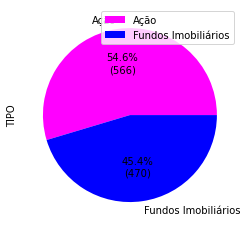

In [19]:
# Contar o número de ocorrências de cada valor na coluna 'TIPO'
value_counts = dfx['TIPO'].value_counts()

colors = ['magenta', 'blue']

pie_chart = value_counts.plot.pie(colors=colors, autopct=lambda p: f'{p:.1f}%\n({int(p * value_counts.sum() / 100)})')

labels = value_counts.index
plt.legend(labels, loc="best")

plt.show()


In [20]:
#Obter as primeiras impressões dos dados, através do resumo estatístico
dfx.describe()

,COTAÇÃO ATUAL,MINIMO,MAXIMO,DIVIDEND YIELD,LIQUIDEZ DIÁRIA,P/VP,CAGR LUCRO,PATRIMÔNIO LÍQUIDO,CAIXA,LUCRO
count,1036.000000,1036.000000,1036.000000,1036.000000,7.910000e+02,9.320000e+02,495.000000,1.036000e+03,1.010000e+03,5.250000e+02
mean,282.507239,67.978851,95.339807,9.706805,2.824111e+07,-1.848003e+03,7.549980,4.836500e+09,1.654176e+08,1.212298e+05
std,3849.579391,503.786174,809.929574,101.116872,1.240741e+08,5.671631e+04,29.960537,2.427232e+10,5.527581e+08,6.002791e+05
min,0.000000,0.000000,0.000000,0.000000,2.500000e+00,-1.731457e+06,-66.310000,-2.314457e+10,-9.096640e+03,-2.162350e+06
25%,5.755000,0.842500,2.847500,0.000000,3.289473e+04,6.600000e-01,-6.555000,7.413497e+07,5.280000e+00,1.510000e+02
50%,19.580000,8.730000,15.200000,2.385000,3.387892e+05,9.700000e-01,2.800000,3.655694e+08,9.226450e+02,1.190700e+04
75%,81.917500,58.897500,80.000000,8.927500,4.299667e+06,1.442500e+00,21.030000,1.840518e+09,8.604476e+07,7.604300e+04
max,94794.810000,15000.000000,24999.000000,2762.620000,2.032931e+09,4.008090e+03,195.340000,4.020840e+11,7.391217e+09,1.017040e+07


In [21]:
# Contar valores ==0
Cotacao_zero = dfx['COTAÇÃO ATUAL']==0
Cotacao_zero.value_counts()
# Percentual de valores == 0 (4,23%)
#(38/897)*100

False    912
True     124
Name: COTAÇÃO ATUAL, dtype: int64

<AxesSubplot:ylabel='Frequency'>

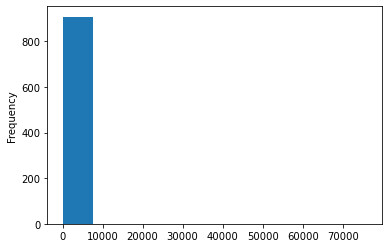

In [22]:
# Busca pela maior incidência de valor (Range entre 0 e 76000)
dfx['COTAÇÃO ATUAL'].loc[lambda x : (x > 0) & (x <= 76000)].plot.hist()

<AxesSubplot:ylabel='Frequency'>

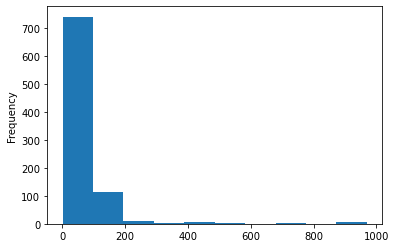

In [23]:
# Busca pela maior incidência de valor(reduzindo o range)
dfx['COTAÇÃO ATUAL'].loc[lambda x : (x > 0) & (x < 1000)].plot.hist()

<AxesSubplot:ylabel='Frequency'>

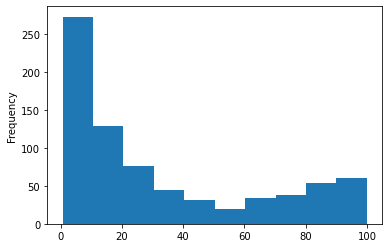

In [24]:
# Busca pela maior incidência de valor(reduzindo o range)
dfx['COTAÇÃO ATUAL'].loc[lambda x : (x > 0) & (x < 100)].plot.hist()

<AxesSubplot:ylabel='Frequency'>

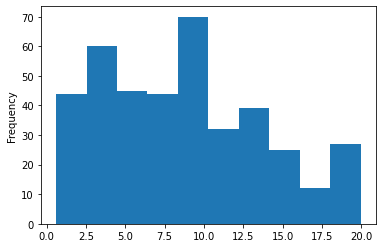

In [25]:
# Busca pela maior incidência de valor(reduzindo o range)
dfx['COTAÇÃO ATUAL'].loc[lambda x : (x > 0) & (x < 20)].plot.hist()

<AxesSubplot:ylabel='Frequency'>

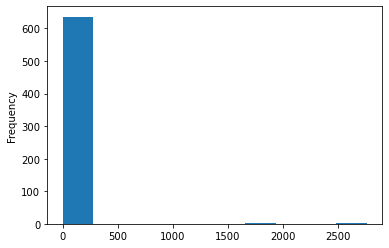

In [26]:
# Localizar as maiores incidências
dfx['DIVIDEND YIELD'].loc[lambda x : (x > 0) & (x <= 10681)].plot.hist()

<AxesSubplot:ylabel='Frequency'>

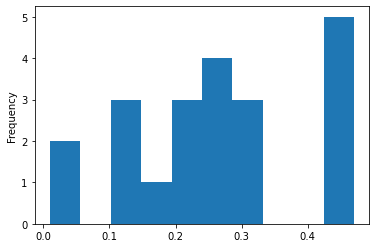

In [27]:
# Localizar as maiores incidências <0.5
dfx['DIVIDEND YIELD'].loc[lambda x : (x > 0) & (x <= 0.5)].plot.hist()

<AxesSubplot:ylabel='Frequency'>

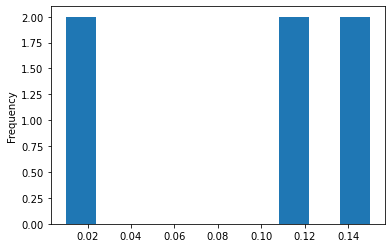

In [28]:
# Localizar as maiores incidências <0.5
dfx['DIVIDEND YIELD'].loc[lambda x : (x > 0) & (x <= 0.2)].plot.hist()
# Verificar % de Dividend Yeld == 0 (30.21%)
#(271/897)*100

In [29]:
# Análise da variável CAGR (Temos valores negativos nesse caso)
dfx['CAGR LUCRO'].value_counts()

 10.69    7
 0.77     4
 22.12    4
 39.24    3
 14.80    3
         ..
 15.62    1
 54.74    1
-4.36     1
 12.05    1
-1.10     1
Name: CAGR LUCRO, Length: 376, dtype: int64

<AxesSubplot:ylabel='Frequency'>

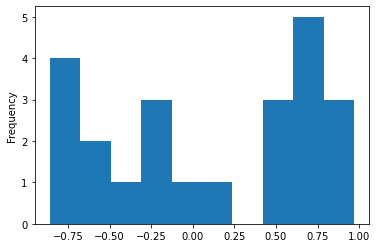

In [30]:
# Localizar as maiores incidências de CAGR 
dfx['CAGR LUCRO'].loc[lambda x : (x > -1.0) & (x <= 1.0)].plot.hist()

<AxesSubplot:ylabel='Frequency'>

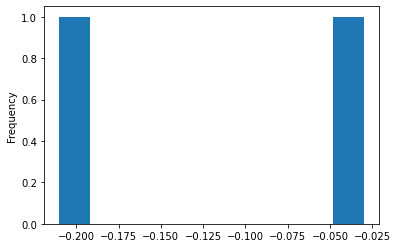

In [31]:
# Zoom na maior concentração de ocorrências de CAGR
dfx['CAGR LUCRO'].loc[lambda x : (x > -0.25) & (x <= 0.2)].plot.hist()

In [32]:
'''#Overview dos dados (Atenção para as correlações)
ProfileReport(dfx)'''

'#Overview dos dados (Atenção para as correlações)\nProfileReport(dfx)'

In [33]:
'''# Converter a variável preditora em numérica
dfx['INVESTIR'] = dfx['INVESTIR'].replace('NÃO', 0)
dfx['INVESTIR'] = dfx['INVESTIR'].replace('SIM', 1)
# Converter para int e Verificar as alterações
dfx['INVESTIR'] = dfx['INVESTIR'].astype('int64')
dfx.info()'''

"# Converter a variável preditora em numérica\ndfx['INVESTIR'] = dfx['INVESTIR'].replace('NÃO', 0)\ndfx['INVESTIR'] = dfx['INVESTIR'].replace('SIM', 1)\n# Converter para int e Verificar as alterações\ndfx['INVESTIR'] = dfx['INVESTIR'].astype('int64')\ndfx.info()"

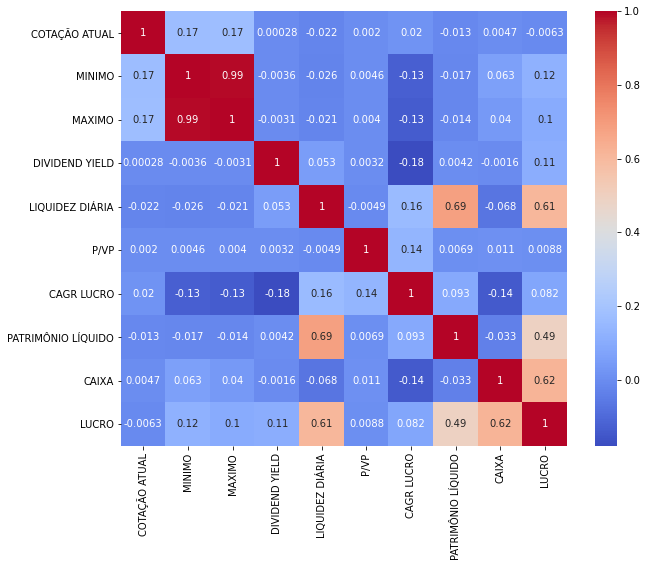

In [34]:
# Selecionar as colunas relevantes para a análise e realizar a matriz de correlação

correlation_matrix = dfx.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()

In [35]:
# Filtrar apenas ações para análise mais profunda
df = dfx[dfx['TIPO'] == 'AÇÃO']
display(df)

,SETOR,TIPO,SETOR.1,COTAÇÃO ATUAL,MINIMO,MAXIMO,DIVIDEND YIELD,LIQUIDEZ DIÁRIA,P/VP,CAGR LUCRO,PATRIMÔNIO LÍQUIDO,CAIXA,LUCRO


In [36]:
# Verificar os tipos de variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SETOR               0 non-null      object 
 1   TIPO                0 non-null      object 
 2   SETOR.1             0 non-null      object 
 3   COTAÇÃO ATUAL       0 non-null      float64
 4   MINIMO              0 non-null      float64
 5   MAXIMO              0 non-null      float64
 6   DIVIDEND YIELD      0 non-null      float64
 7   LIQUIDEZ DIÁRIA     0 non-null      float64
 8   P/VP                0 non-null      float64
 9   CAGR LUCRO          0 non-null      float64
 10  PATRIMÔNIO LÍQUIDO  0 non-null      float64
 11  CAIXA               0 non-null      float64
 12  LUCRO               0 non-null      float64
dtypes: float64(10), object(3)
memory usage: 0.0+ bytes


In [37]:
#Visualização dos setores das ações
df.value_counts(df['SETOR'])

Series([], dtype: int64)

In [38]:
#Filtrar ações por setor e obter a média de cada setor

Uti_Púb = df[df['SETOR'] == 'Utilidade Pública']
Bens_Ind = df[df['SETOR'] == 'Bens Industriais']
Mat_Básico = df[df['SETOR'] == 'Materiais Básicos']
Cons_Cíclico = df[df['SETOR'] == 'Consumo Cíclico']
Cons_n_Cícl = df[df['SETOR'] == 'Consumo não Cíclico']
Saúde = df[df['SETOR'] == 'Saúde']
Fin_e_Outros = df[df['SETOR'] == 'Financeiro e Outros']
Tec_da_Info = df[df['SETOR'] == 'Tecnologia da Informação']
Petr_Gás_e_Biocomb = df[df['SETOR'] == 'Petróleo, Gás e Biocombustíveis']

#lista para unir os DataFrames de cada setor
ma=[]

ma.append(Cons_Cíclico)
ma.append(Fin_e_Outros)
ma.append(Uti_Púb)
ma.append(Bens_Ind)
ma.append(Mat_Básico)
ma.append(Cons_n_Cícl)
ma.append(Saúde)
ma.append(Tec_da_Info)
ma.append(Petr_Gás_e_Biocomb)

# lista com os nomes de cada setor (para faciltar)
ma2=[]

ma2.append('Cons_Cíclico')
ma2.append('Fin_e_Outros')
ma2.append('Uti_Púb')
ma2.append('Bens_Ind')
ma2.append('Mat_Básico')
ma2.append('Cons_n_Cícl')
ma2.append('Saúde')
ma2.append('Tec_da_Info')
ma2.append('Petr_Gás_e_Biocomb')

dfa = pd.DataFrame(zip(ma))

#display(ma)

#média do dy
media = Cons_Cíclico['DIVIDEND YIELD'].mean()
print("Média da coluna 'DIVIDEND YIELD':\033[1;32m", media, '\033[m')

Média da coluna 'DIVIDEND YIELD': nan 


In [39]:
# Média de cotação por setor
cont = 0
for c in ma:
    media = c['COTAÇÃO ATUAL'].mean()
    #print(c)
    print("Média da coluna 'COTAÇÃO ATUAL' do setor {}:\033[1;32m".format(ma2[cont]), media, '\033[m')
    cont += 1

Média da coluna 'COTAÇÃO ATUAL' do setor Cons_Cíclico: nan 
Média da coluna 'COTAÇÃO ATUAL' do setor Fin_e_Outros: nan 
Média da coluna 'COTAÇÃO ATUAL' do setor Uti_Púb: nan 
Média da coluna 'COTAÇÃO ATUAL' do setor Bens_Ind: nan 
Média da coluna 'COTAÇÃO ATUAL' do setor Mat_Básico: nan 
Média da coluna 'COTAÇÃO ATUAL' do setor Cons_n_Cícl: nan 
Média da coluna 'COTAÇÃO ATUAL' do setor Saúde: nan 
Média da coluna 'COTAÇÃO ATUAL' do setor Tec_da_Info: nan 
Média da coluna 'COTAÇÃO ATUAL' do setor Petr_Gás_e_Biocomb: nan 


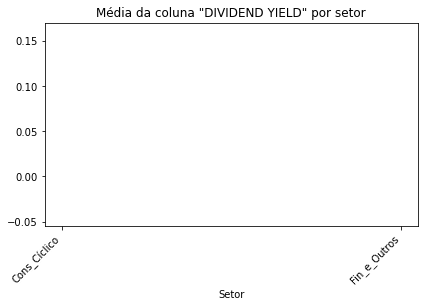

In [40]:
# Gráfico da média de Dividend Yield de ações

import matplotlib.pyplot as plt

cont = 0
medias = []

for c in ma:
    # Verifique a estrutura dos dados e as colunas corretas
    if 'DIVIDEND YIELD' in c:
        media = c['DIVIDEND YIELD'].mean()
        medias.append(media)
    else:
        medias.append(0)  # Trate o caso em que a coluna não existe ou não tem valores

    cont += 1

plt.bar(ma2, medias, width=0.5)
plt.xlabel('Setor')
#plt.ylabel('Média da coluna "DIVIDEND YIELD"')
plt.title('Média da coluna "DIVIDEND YIELD" por setor')
plt.xticks(rotation=45, ha='right')
plt.ylim(top=0.170)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Ajusta o espaço inferior para acomodar os rótulos

plt.show()

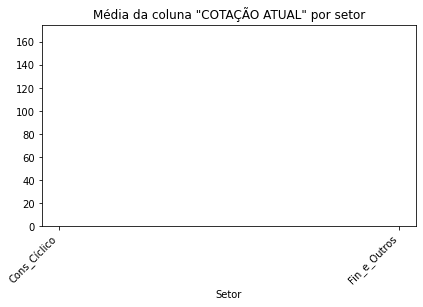

In [41]:
# Gráfico da média de Cotação atual de ações

cont = 0
medias = []

for c in ma:
    if 'COTAÇÃO ATUAL' in c:
        media = c['COTAÇÃO ATUAL'].mean()
        medias.append(media)
    else:
        medias.append(0)

    cont += 1

plt.bar(ma2, medias, width=0.5)
plt.xlabel('Setor')
#plt.ylabel('Média da coluna "COTAÇÃO ATUAL"')
plt.title('Média da coluna "COTAÇÃO ATUAL" por setor')
plt.xticks(rotation=45, ha='right')
plt.ylim(top=175)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2) 
plt.show()

In [42]:
# Verificar se as variáveis estão no formato correto
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SETOR               0 non-null      object 
 1   TIPO                0 non-null      object 
 2   SETOR.1             0 non-null      object 
 3   COTAÇÃO ATUAL       0 non-null      float64
 4   MINIMO              0 non-null      float64
 5   MAXIMO              0 non-null      float64
 6   DIVIDEND YIELD      0 non-null      float64
 7   LIQUIDEZ DIÁRIA     0 non-null      float64
 8   P/VP                0 non-null      float64
 9   CAGR LUCRO          0 non-null      float64
 10  PATRIMÔNIO LÍQUIDO  0 non-null      float64
 11  CAIXA               0 non-null      float64
 12  LUCRO               0 non-null      float64
dtypes: float64(10), object(3)
memory usage: 0.0+ bytes


In [43]:
#display(Híbrido)

#Possíveis outliers
#tirar ERCR11

#display(Lajes_Corp)
#tirar BLMO11, BBFI11B(analisar) 

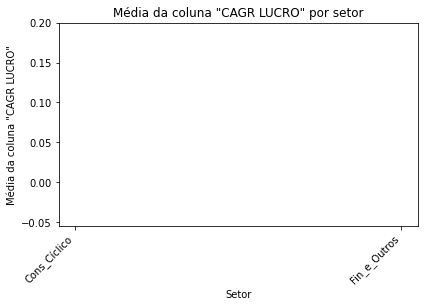

In [44]:
#Gráfico da média de CAGR LUCRO de ações
cont = 0
medias = []

for c in ma:
    if 'CAGR LUCRO' in c:
        media = c['CAGR LUCRO'].mean()
        medias.append(media)
    else:
        medias.append(0)

    cont += 1

plt.bar(ma2, medias, width=0.5)
plt.xlabel('Setor')
plt.ylabel('Média da coluna "CAGR LUCRO"')
plt.title('Média da coluna "CAGR LUCRO" por setor')
plt.xticks(rotation=45, ha='right')
plt.ylim(top=0.2)#, bottom=-0.20
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

<AxesSubplot:ylabel='Frequency'>

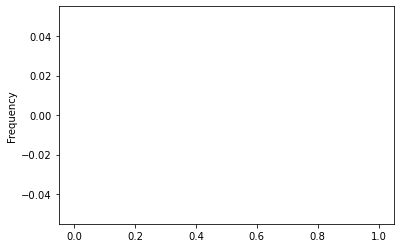

In [45]:
# Localizar as maiores incidências de CAGR 
df['CAGR LUCRO'].loc[lambda x : (x > -1.0) & (x <= 1.0)].plot.hist()

In [46]:
#Possíveis outliers

#display(Cons_Cíclico)
#tirar MYPK3

#display(Uti_Púb)
#tirar CPRE3, ENMT3, ENMT4

#display(Mat_Básico)
#tirar CSNA3

#display(Tec_da_Info)
#tirar BRQB3

#display(Petr_Gás_e_Biocomb)
#tirar PRIO3

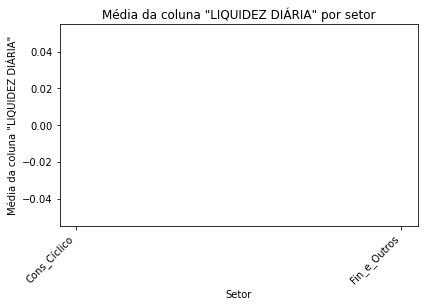

In [47]:
# Gráfico de detalhamento de LIQUIDEZ DIÁRIA
cont = 0
medias = []

for c in ma:
    if 'LIQUIDEZ DIÁRIA' in c:
        media = c['LIQUIDEZ DIÁRIA'].mean()
        medias.append(media)
    else:
        medias.append(0)

    cont += 1

# Plotando o gráfico
plt.bar(ma2, medias, width=0.5)
plt.xlabel('Setor')
plt.ylabel('Média da coluna "LIQUIDEZ DIÁRIA"')
plt.title('Média da coluna "LIQUIDEZ DIÁRIA" por setor')
plt.xticks(rotation=45, ha='right')
#plt.ylim(top=1)#, bottom=-0.20
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

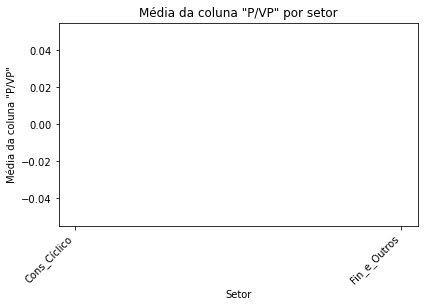

In [48]:
# Gráfico de detalhamento de P/VP por setor
cont = 0
medias = []

for c in ma:
    if 'P/VP' in c:
        media = c['P/VP'].mean()
        medias.append(media)
    else:
        medias.append(0)

    cont += 1

plt.bar(ma2, medias, width=0.5)
plt.xlabel('Setor')
plt.ylabel('Média da coluna "P/VP"')
plt.title('Média da coluna "P/VP" por setor')
plt.xticks(rotation=45, ha='right')
#plt.ylim(top=25, bottom=-0.20)#
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

In [49]:
#possíveis outliers

#display(Fin_e_Outros)
# tirar BTTL4, PPLA11, SPRT3B

#display(Bens_Ind)
#tirar BBML3, DTCY3, DTCY4, RCSL3, SHUL3, WEGE3, MYPK3

#display(Uti_Púb)
#tirar CPRE3, ENMT3, ENMT4

#display(Mat_Básico)
#tirar CSNA3

#display(Tec_da_Info)
#tirar BRQB3

#display(Petr_Gás_e_Biocomb)
#tirar PRIO3'''

C:\Users\elysi\anaconda3\lib\site-packages\seaborn\matrix.py:194: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\elysi\anaconda3\lib\site-packages\seaborn\matrix.py:199: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


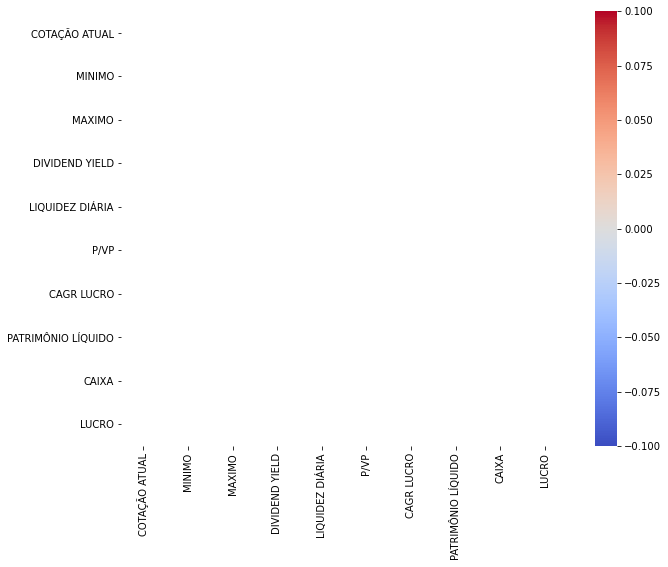

In [50]:
# Calcular a matriz de correlação para entender quais as variáveis são mais relevantes filtrando apenas ações
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()


In [51]:
# Filtrar apenas fundos para análise mais profunda
df2 = dfx[dfx['TIPO'] == 'FUNDO']
display(df2)

,SETOR,TIPO,SETOR.1,COTAÇÃO ATUAL,MINIMO,MAXIMO,DIVIDEND YIELD,LIQUIDEZ DIÁRIA,P/VP,CAGR LUCRO,PATRIMÔNIO LÍQUIDO,CAIXA,LUCRO


In [52]:
#Verificar as dimensões dos dados
df2.shape

(0, 13)

In [53]:
#Verificar os tipos dos dados para buscar e corrigir inconsistências
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SETOR               0 non-null      object 
 1   TIPO                0 non-null      object 
 2   SETOR.1             0 non-null      object 
 3   COTAÇÃO ATUAL       0 non-null      float64
 4   MINIMO              0 non-null      float64
 5   MAXIMO              0 non-null      float64
 6   DIVIDEND YIELD      0 non-null      float64
 7   LIQUIDEZ DIÁRIA     0 non-null      float64
 8   P/VP                0 non-null      float64
 9   CAGR LUCRO          0 non-null      float64
 10  PATRIMÔNIO LÍQUIDO  0 non-null      float64
 11  CAIXA               0 non-null      float64
 12  LUCRO               0 non-null      float64
dtypes: float64(10), object(3)
memory usage: 0.0+ bytes


In [54]:
#Entendendo melhor a variável "Setor" dos fundos imobiliários
df2.value_counts(df2['SETOR'])

Series([], dtype: int64)

In [55]:
#filtro dos fundos

#setores fundos
Tit_e_Val_Mob = df2[df2['SETOR'] == 'Títulos e Val. Mob.']
Laj_Corp = df2[df2['SETOR'] == 'Lajes Corporativas']
Hotel = df2[df2['SETOR'] == 'Hotel']
Residencial = df2[df2['SETOR'] == 'Residencial']
Hospital = df2[df2['SETOR'] == 'Hospital']
Fiagro = df2[df2['SETOR'] == 'Fiagro']
Shoppings = df2[df2['SETOR'] == 'Shoppings']
Outros = df2[df2['SETOR'] == 'Outros']
Hotel = df2[df2['SETOR'] == 'Logística']
Renda = df2[df2['SETOR'] == 'Renda']
Híbrido = df2[df2['SETOR'] == 'Híbrido']

mf=[]
mf.append(Tit_e_Val_Mob)
mf.append(Laj_Corp)
mf.append(Hotel)
mf.append(Residencial)
mf.append(Hospital)
mf.append(Fiagro)
mf.append(Shoppings)
mf.append(Outros)
mf.append(Hotel)
mf.append(Renda)
mf.append(Híbrido)

mf2=[]

mf2.append('Tit_e_Val_Mob')
mf2.append('Laj_Corp')
mf2.append('Hotel')
mf2.append('Residencial')
mf2.append('Hospital')
mf2.append('Fiagro')
mf2.append('Shoppings')
mf2.append('Outros')
mf2.append('Hotel')
mf2.append('Renda')
mf2.append('Híbrido')

#display(mf)

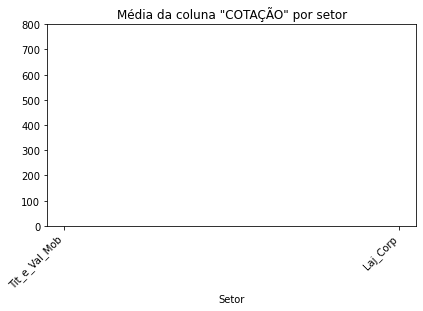

In [56]:
#Detalhamento da categoria "Cotação"
cont = 0
medias = []

for c in mf:
    if 'COTAÇÃO ATUAL' in c:
        media = c['COTAÇÃO ATUAL'].mean()
        medias.append(media)
    else:
        medias.append(0)

    cont += 1

plt.bar(mf2, medias, width=0.5)
plt.xlabel('Setor')
#plt.ylabel('Média da coluna "COTAÇÃO"')
plt.title('Média da coluna "COTAÇÃO" por setor')
plt.xticks(rotation=45, ha='right')
plt.ylim(top=800, bottom=0)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()


In [57]:
# Possíveis outliars

#display(Híbrido)
#excluir STRX11, ERCR11

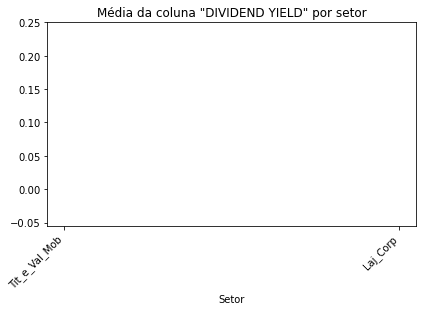

In [58]:
# Gráfico de detalhamento do DY
cont = 0
medias = []

for c in mf:
    if 'DIVIDEND YIELD' in c:
        media = c['DIVIDEND YIELD'].mean()
        medias.append(media)
    else:
        medias.append(0)

    cont += 1

# Plotando o gráfico
plt.bar(mf2, medias, width=0.5)
plt.xlabel('Setor')
#plt.ylabel('Média da coluna "DIVIDEND YIELD"')
plt.title('Média da coluna "DIVIDEND YIELD" por setor')
plt.xticks(rotation=45, ha='right')
plt.ylim(top=0.25)#, bottom=-0.20
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

In [59]:
# Média de cagr dos fundos
cont = 0
for c in mf:
    media = c['CAGR LUCRO'].mean()
    #print(c)
    print("Média da coluna 'CAGR LUCRO' do setor {}:\033[1;32m".format(mf2[cont]), media, '\033[m')
    cont += 1

# Nenhum setor de Fundos tem média de evolução do lucro positiva, o que representa um risco para os investimentos.

Média da coluna 'CAGR LUCRO' do setor Tit_e_Val_Mob: nan 
Média da coluna 'CAGR LUCRO' do setor Laj_Corp: nan 
Média da coluna 'CAGR LUCRO' do setor Hotel: nan 
Média da coluna 'CAGR LUCRO' do setor Residencial: nan 
Média da coluna 'CAGR LUCRO' do setor Hospital: nan 
Média da coluna 'CAGR LUCRO' do setor Fiagro: nan 
Média da coluna 'CAGR LUCRO' do setor Shoppings: nan 
Média da coluna 'CAGR LUCRO' do setor Outros: nan 
Média da coluna 'CAGR LUCRO' do setor Hotel: nan 
Média da coluna 'CAGR LUCRO' do setor Renda: nan 
Média da coluna 'CAGR LUCRO' do setor Híbrido: nan 


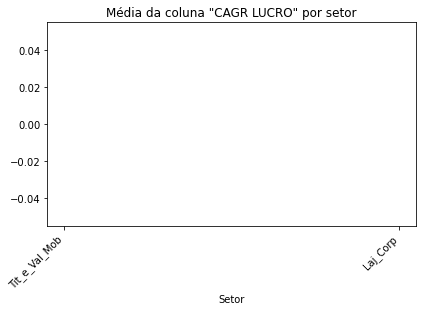

In [60]:
# Detalhamento do CAGR por setor
cont = 0
medias = []

for c in mf:
    if 'CAGR LUCRO' in c:
        media = c['CAGR LUCRO'].mean()
        medias.append(media)
    else:
        medias.append(0)

    cont += 1

plt.bar(mf2, medias, width=0.5)
plt.xlabel('Setor')
#plt.ylabel('Média da coluna "CAGR LUCRO"')
plt.title('Média da coluna "CAGR LUCRO" por setor')
plt.xticks(rotation=45, ha='right')
#plt.ylim(top=0.2)#, bottom=-0.20
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

<AxesSubplot:ylabel='Frequency'>

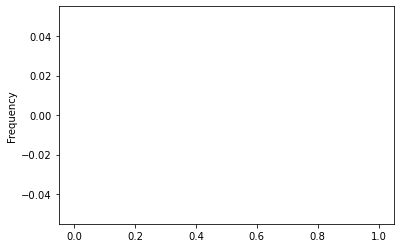

In [61]:
# Localizar concentração de CAGR > 0
df2['CAGR LUCRO'].loc[lambda x : (x > 0) & (x <= 1.0)].plot.hist()

In [62]:
#FILTRAR O CAGR DOS FUNDOS PARA COMPREENDER A MÉDIA DE CAGR DE FUNDOS !=0
cagr_melhores_f = df2[df2['CAGR LUCRO'] != 0] 

#Média do CAGR dos fundos, excluindo os valores 0
display(cagr_melhores_f['CAGR LUCRO'].mean())
cagr_melhores_f.shape

nan

(0, 13)

In [63]:
#Visualizar o setor com maior ocorrências em detalhes
display(Outros)

,SETOR,TIPO,SETOR.1,COTAÇÃO ATUAL,MINIMO,MAXIMO,DIVIDEND YIELD,LIQUIDEZ DIÁRIA,P/VP,CAGR LUCRO,PATRIMÔNIO LÍQUIDO,CAIXA,LUCRO


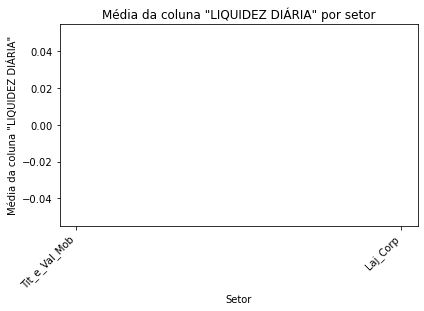

In [64]:
# DETALHE DE LIQUIDEZ DIÁRIA POR SETOR
cont = 0
medias = []

for c in mf:
    if 'LIQUIDEZ DIÁRIA' in c:
        media = c['LIQUIDEZ DIÁRIA'].mean()
        medias.append(media)
    else:
        medias.append(0)

    cont += 1

plt.bar(mf2, medias, width=0.5)
plt.xlabel('Setor')
plt.ylabel('Média da coluna "LIQUIDEZ DIÁRIA"')
plt.title('Média da coluna "LIQUIDEZ DIÁRIA" por setor')
plt.xticks(rotation=45, ha='right')
#plt.ylim(top=10000000)#, bottom=-0.20
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

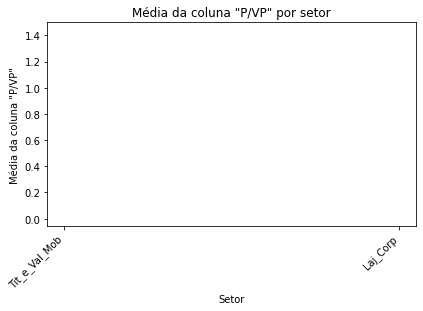

In [65]:
# GRÁFICO DE P/VP POR SETOR

cont = 0
medias = []

for c in mf:
    if 'P/VP' in c:
        media = c['P/VP'].mean()
        medias.append(media)
    else:
        medias.append(0)

    cont += 1

plt.bar(mf2, medias, width=0.5)
plt.xlabel('Setor')
plt.ylabel('Média da coluna "P/VP"')
plt.title('Média da coluna "P/VP" por setor')
plt.xticks(rotation=45, ha='right')
plt.ylim(top=1.5)#, bottom=-0.20
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

In [66]:
#Criação da variável preditora em python ( NÃO SERÁ MAIS NECESSÁRIO PORQUE CONVERTEMOS A VARIÁVEL PREDITORA EM 0 E 1)
'''atributo_filtro = []


def analise(varpred, atributo):
    for valor in varpred[atributo]:
        if atributo == 'DIVIDEND YIELD':
            if valor > 0.06:
                atributo_filtro.append('Sim')
            else:
                atributo_filtro.append('Não')
                
        elif atributo == 'LIQUIDEZ DIÁRIA':
            if valor > 1000000:
                atributo_filtro.append('Sim')
            else:
                atributo_filtro.append('Não')
                
        elif atributo == 'P/VP':
            if valor < 1.2 and valor > 0.3:
                atributo_filtro.append('Sim')
            else:
                atributo_filtro.append('Não')
                
        elif atributo == 'CAGR LUCRO':
            if valor > 0.05:
                atributo_filtro.append('Sim')
            else:
                atributo_filtro.append('Não')
            
    varpred['analise',atributo] = atributo_filtro
    print(varpred.value_counts(varpred['analise', atributo]))
    display(varpred)
    
analise(dfx, 'CAGR LUCRO')'''

"atributo_filtro = []\n\n\ndef analise(varpred, atributo):\n    for valor in varpred[atributo]:\n        if atributo == 'DIVIDEND YIELD':\n            if valor > 0.06:\n                atributo_filtro.append('Sim')\n            else:\n                atributo_filtro.append('Não')\n                \n        elif atributo == 'LIQUIDEZ DIÁRIA':\n            if valor > 1000000:\n                atributo_filtro.append('Sim')\n            else:\n                atributo_filtro.append('Não')\n                \n        elif atributo == 'P/VP':\n            if valor < 1.2 and valor > 0.3:\n                atributo_filtro.append('Sim')\n            else:\n                atributo_filtro.append('Não')\n                \n        elif atributo == 'CAGR LUCRO':\n            if valor > 0.05:\n                atributo_filtro.append('Sim')\n            else:\n                atributo_filtro.append('Não')\n            \n    varpred['analise',atributo] = atributo_filtro\n    print(varpred.value_counts(va

C:\Users\elysi\anaconda3\lib\site-packages\seaborn\matrix.py:194: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\elysi\anaconda3\lib\site-packages\seaborn\matrix.py:199: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


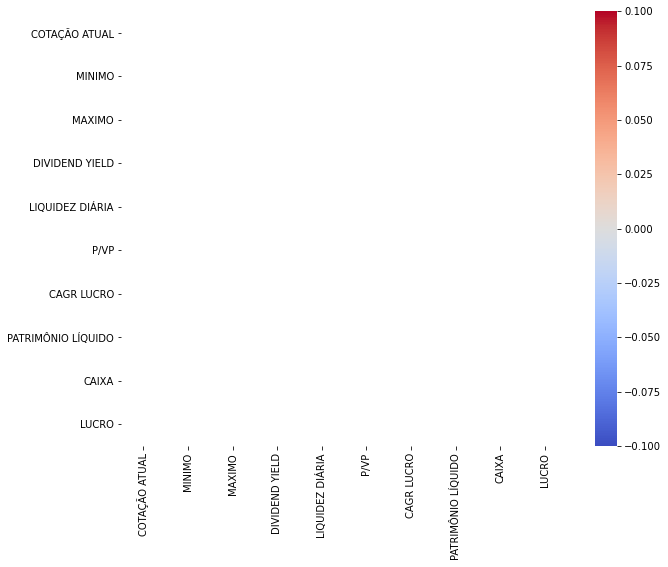

In [67]:
# Calcular a matriz de correlação para entender quais as variáveis são mais relevantes (LUCRO = 0 NA MAIOR PARTE DAS INSTÂNCIAS)
correlation_matrix = df2.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()


In [68]:
# Contar as instâncias da variável (Lucro)
df2['LUCRO'].value_counts()

Series([], Name: LUCRO, dtype: int64)

In [69]:
# Redução do dataset para preparação dos modelos

df1 = dfx[['DIVIDEND YIELD', 'LIQUIDEZ DIÁRIA', 'P/VP', 'CAGR LUCRO']]#, 'INVESTIR'

#display(df1)


In [70]:
## Resumo Estatistico antes da remoção de outliers
df1.describe()

# A Princípio notamos uma amplitude muito elevada e, por consequência um Std muito elevado também. 
# Outro ponto que chama a atenção é a média de P/VP -13.89 (valor muito baixo, possível outlier puxando a média para baixo)

,DIVIDEND YIELD,LIQUIDEZ DIÁRIA,P/VP,CAGR LUCRO
count,1036.000000,7.910000e+02,9.320000e+02,495.000000
mean,9.706805,2.824111e+07,-1.848003e+03,7.549980
std,101.116872,1.240741e+08,5.671631e+04,29.960537
min,0.000000,2.500000e+00,-1.731457e+06,-66.310000
25%,0.000000,3.289473e+04,6.600000e-01,-6.555000
50%,2.385000,3.387892e+05,9.700000e-01,2.800000
75%,8.927500,4.299667e+06,1.442500e+00,21.030000
max,2762.620000,2.032931e+09,4.008090e+03,195.340000


In [71]:
#Normailizar apenas a coluna 'LIQUIDEZ DIÁRIA', porque nela não há valor abaixo de zero e os valores exorbitantes não devem ser 
# considerados outlier. Vimos na análise exploratória que os valores dessa coluna podem ser altos devido ao setor de Petróleo e gás

from sklearn.preprocessing import MinMaxScaler

def normalize_column(df1, column_name):
    scaler = MinMaxScaler(feature_range=(0, 1))
    df1[column_name] = scaler.fit_transform(df1[[column_name]])
    return df1

# Exemplo de uso
df_normalized = normalize_column(df1, 'LIQUIDEZ DIÁRIA')

<ipython-input-71-bdc639359618>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column_name] = scaler.fit_transform(df1[[column_name]])


In [72]:
# Notamos valores estranhos no P/VP. Valores muito negativos indicam que a empresa não é uma boa opção de investimento, 
# logo não há problema em ser desconsiderada no dataset. 
print(df_normalized)

      DIVIDEND YIELD  LIQUIDEZ DIÁRIA  P/VP  CAGR LUCRO
0               0.00         0.002973  3.11         NaN
1               8.64         0.009104  0.78       12.65
2               5.13         0.156660  2.75       15.19
3               0.00              NaN -1.29         NaN
4               0.00         0.004683  1.21         NaN
...              ...              ...   ...         ...
1031           11.47         0.000134  0.32      -38.06
1032           11.01         0.000335  0.98       -4.88
1033            2.61         0.000002  0.98         NaN
1034            7.91         0.000096  1.00         NaN
1035            0.00         0.000006  0.83         NaN

[1036 rows x 4 columns]


In [73]:
# Resumo estatistico do df normalizado
df_normalized.describe()

,DIVIDEND YIELD,LIQUIDEZ DIÁRIA,P/VP,CAGR LUCRO
count,1036.000000,791.000000,9.320000e+02,495.000000
mean,9.706805,0.013892,-1.848003e+03,7.549980
std,101.116872,0.061032,5.671631e+04,29.960537
min,0.000000,0.000000,-1.731457e+06,-66.310000
25%,0.000000,0.000016,6.600000e-01,-6.555000
50%,2.385000,0.000167,9.700000e-01,2.800000
75%,8.927500,0.002115,1.442500e+00,21.030000
max,2762.620000,1.000000,4.008090e+03,195.340000


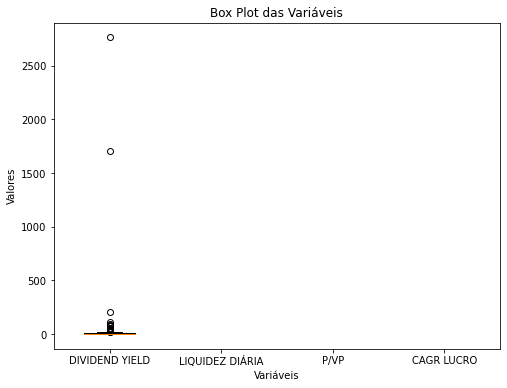

In [74]:
#Ver a distribuição inicial numa boxplot

import matplotlib.pyplot as plt

#box plot
plt.figure(figsize=(8, 6))
plt.boxplot([df_normalized['DIVIDEND YIELD'], df_normalized['LIQUIDEZ DIÁRIA'], df_normalized['P/VP'], df_normalized['CAGR LUCRO']])
plt.xticks([1, 2, 3, 4], ['DIVIDEND YIELD', 'LIQUIDEZ DIÁRIA', 'P/VP', 'CAGR LUCRO'])
plt.title('Box Plot das Variáveis')
plt.xlabel('Variáveis')
plt.ylabel('Valores')
plt.show()

In [75]:
#Remoção de outlier Método IQR 

'''Q1 = df_normalized.quantile(0.25)
Q3 = df_normalized.quantile(0.75)
IQR = Q3 - Q1
df_final = df_normalized[~((df_normalized < (Q1 - 1.5 * IQR)) | (df_normalized > (Q3 + 1.5 * IQR)))]

display(df_final)'''
# O método não removeu nenhum valor, por isso não parece ser viável

'Q1 = df_normalized.quantile(0.25)\nQ3 = df_normalized.quantile(0.75)\nIQR = Q3 - Q1\ndf_final = df_normalized[~((df_normalized < (Q1 - 1.5 * IQR)) | (df_normalized > (Q3 + 1.5 * IQR)))]\n\ndisplay(df_final)'

In [76]:
# Método hampel

'''def remove_outlier_Hampel(df_normalized):
    for column in ['DIVIDEND YIELD', 'LIQUIDEZ DIÁRIA', 'P/VP', 'CAGR LUCRO']:
        med = df_normalized[column].median()
        List = abs(df_normalized[column] - med)
        cond = List.median() * 4.5
        df_normalized = df_normalized[~(List > cond)]
    return df_normalized


# Remove outliers utilizando a função remove_outlier_Hampel
df_cleaned = remove_outlier_Hampel(df_normalized)

# Criar o box plot com as variáveis desejadas
import seaborn as sns
import matplotlib.pyplot as plt

# Remoção de outliers
df_cleaned = remove_outlier_Hampel(df_normalized)

# Criação do boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned[['DIVIDEND YIELD', 'LIQUIDEZ DIÁRIA', 'P/VP', 'CAGR LUCRO']])
plt.xticks(rotation=90)
plt.xlabel('Variáveis')
plt.ylabel('Valores')
plt.title('Boxplot das Variáveis')
plt.show()
df_cleaned.describe()'''

# Método hampel deixou apenas 252 instâncias, o que entendemos ser um número baixo para trabalhar

"def remove_outlier_Hampel(df_normalized):\n    for column in ['DIVIDEND YIELD', 'LIQUIDEZ DIÁRIA', 'P/VP', 'CAGR LUCRO']:\n        med = df_normalized[column].median()\n        List = abs(df_normalized[column] - med)\n        cond = List.median() * 4.5\n        df_normalized = df_normalized[~(List > cond)]\n    return df_normalized\n\n\n# Remove outliers utilizando a função remove_outlier_Hampel\ndf_cleaned = remove_outlier_Hampel(df_normalized)\n\n# Criar o box plot com as variáveis desejadas\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Remoção de outliers\ndf_cleaned = remove_outlier_Hampel(df_normalized)\n\n# Criação do boxplot\nplt.figure(figsize=(8, 6))\nsns.boxplot(data=df_cleaned[['DIVIDEND YIELD', 'LIQUIDEZ DIÁRIA', 'P/VP', 'CAGR LUCRO']])\nplt.xticks(rotation=90)\nplt.xlabel('Variáveis')\nplt.ylabel('Valores')\nplt.title('Boxplot das Variáveis')\nplt.show()\ndf_cleaned.describe()"

In [77]:
#Remover outliers com função específica

def remove_rows(df1):
    condition = (df1['DIVIDEND YIELD'] > 1) | (df1['P/VP'] > 2) | (df1['P/VP'] < -0.5) | (df1['CAGR LUCRO'] > 2) | (df1['CAGR LUCRO'] < -1)
    df_filtered = df1[~condition]
    return df_filtered
# Restaram 736 variáveis, esta é a melhor opção para remoção de outliers

In [78]:
#Exibir o dataset reduzido (161 estâncias retiradas)
df_final = remove_rows(df1)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 4 to 1035
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DIVIDEND YIELD   271 non-null    float64
 1   LIQUIDEZ DIÁRIA  127 non-null    float64
 2   P/VP             173 non-null    float64
 3   CAGR LUCRO       2 non-null      float64
dtypes: float64(4)
memory usage: 10.6 KB


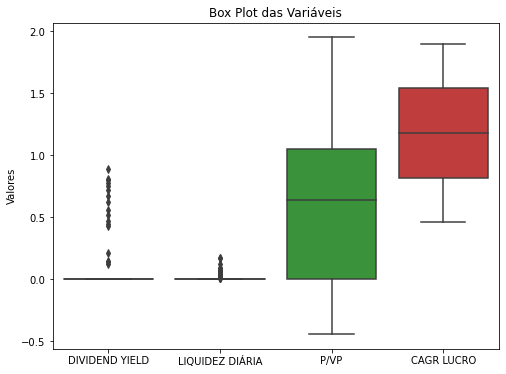

In [79]:
#Exibir plot após a remoção dos outliers(aparentemente nenhum dos métodos atingiu a expectativa, devido a composição das suas fórumulas)
    
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_final[['DIVIDEND YIELD', 'LIQUIDEZ DIÁRIA', 'P/VP', 'CAGR LUCRO']])
plt.title('Box Plot das Variáveis')
plt.ylabel('Valores')
plt.show()

In [80]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

#Inicialização do WCSS
wcss = []

#Experimentar o algoritmo K-Means com K a variar entre 1 e 10 e considerando a variante 'k-means++' para eliminar o problema da inicialização dos centróides
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df_final[['DIVIDEND YIELD', 'LIQUIDEZ DIÁRIA', 'P/VP', 'CAGR LUCRO']])
    wcss.append(kmeans.inertia_)
    
#Visualizar a variação do WCSS nos 10 clusters
plt.plot(range(1, 11), wcss)
plt.title('Método Elbow')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

print("O número óptimo de clusters é 4")

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# Testando o K-means para localizar os clusters (Resultado não é claro)
# Selecionando as colunas relevantes do dataset
#X = df_final[['DIVIDEND YIELD', 'LIQUIDEZ DIÁRIA', 'P/VP', 'CAGR LUCRO']].values

'''# Executando o K-means para o número ideal de clusters
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Plotando os clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters')
plt.xlabel('Variáveis')
plt.legend()
plt.show()
'''

In [85]:
# Selecionando as colunas relevantes do dataset
X = df_final[['DIVIDEND YIELD', 'LIQUIDEZ DIÁRIA', 'P/VP', 'CAGR LUCRO']].values
y = df_final[['INVESTIR']].values

KeyError: "None of [Index(['INVESTIR'], dtype='object')] are in the [columns]"

In [ ]:
#Pela análise do dendograma consideramos 4 clusters
import scipy.cluster.hierarchy as sch

#O método 'linkage'permite definir a técnica de clustering a utilizar. Aqui utilizamos a métrica da minimização da variância dentro dos clusters chamada 'ward'
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrograma')
plt.xlabel('Variáveis')
plt.ylabel('Distância Euclideana')
plt.show()

In [ ]:
#Impressão de valores
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
print(y_hc)

In [ ]:
# Buscando uma melhor visualização para os clusters

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, random_state=0)
labels = kmeans.fit_predict(X)

# Calculando o coeficiente de silhueta para cada amostra
silhouette_avg = silhouette_score(X, labels)
sample_silhouette_values = silhouette_samples(X, labels)

In [ ]:
# Criando um gráfico para visualizar os clusters e o coeficiente de silhueta
fig, ax1 = plt.subplots()
fig.set_size_inches(8, 6)

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.get_cmap("Spectral")(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

ax1.set_title("Silhouette plot")
ax1.set_xlabel("Silhouette coefficient")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])
ax1.set_xticks([-1, -0.5, 0, 0.5, 1])

plt.show()

In [ ]:
# Visualizar valores X para o modelo
display(X)

In [ ]:
# Visualizar valores y para o modelo (apenas 0 e 1, tudo certo)
#display(y)

In [ ]:
# Criar um objeto de regressão linear

# Separando os dados em treino e teste 30% de teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)
regression = LinearRegression()

regression.fit(X, y)

y_pred = regression.predict(X)

mse = mean_squared_error(y, y_pred)
print("Erro quadrático médio:", mse)

print("Coeficientes:", regression.coef_)
print("Interceptação:", regression.intercept_)

#Erro quadrático médio: 0.21554719996476726
#Coeficientes: [[ 0.84041462 -0.03654904 -0.02003373  0.44630897]]
#Interceptação: [0.28764922]

In [ ]:
# Modelo Regressão logística com 30% de treino

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Acurácia:", accuracy)

# Acurácia: 0.6153846153846154

In [ ]:
# Testando regressão logística com PCA (Resultado muito parecido)

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Acurácia:", accuracy)

# Acurácia: 0.6199095022624435

In [ ]:
#Treinar o modelo com KNN 30% de teste(acurácia 91%)
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X,y)

neigh.score(X,y)
# com 25% de treino a acurácia cai para 81%

In [ ]:
# Modelo Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

classifier_nb = GaussianNB()

classifier_nb.fit(X_train, y_train)

y_pred = classifier_nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Acurácia Naive Bayes (30% de teste):", accuracy)
# 0.6968325791855203 (Continua abaixo de 70% mesmo alterando o random e o % de teste)

In [ ]:
# Modelo KPMN

from kmodes.kprototypes import KPrototypes
from sklearn.model_selection import train_test_split

# Dividir os dados em conjunto de treinamento e teste (30% dos dados de teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


classifier_kpmn = KPrototypes(n_clusters=4, init='Cao', n_init=1, verbose=2)

classifier_kpmn.fit(X_train_scaled, categorical=[0, 1, 2])

y_pred = classifier_kpmn.predict(X_test_scaled, categorical=[0, 1, 2])

accuracy = accuracy_score(y_test, y_pred)
print("Acurácia KPMN (30% de teste):", accuracy)
#Acurácia KPMN (30% de teste): 0.4253393665158371 (mesmo alterando o ramdom e o % de teste não temos mais de 50%)

In [ ]:
# Árvore de decisão (melhor modelo)
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)
#Acurácia: 0.9945652173913043

In [ ]:
y_pred

In [ ]:
# Verificar a precisão do modelo e calcular a matriz de confusão
from sklearn.metrics import accuracy_score, confusion_matrix


accuracy = accuracy_score(y_test, y_pred)
print("Precisão:", accuracy)

confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(confusion)


In [ ]:
# Plot da árvore de decisão

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_names = ['DIVIDEND YIELD', 'LIQUIDEZ DIÁRIA', 'P/VP', 'CAGR LUCRO']

fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(classifier, feature_names=feature_names, filled=True, ax=ax)
plt.show()


In [ ]:
# Explorar a variável (investir)
df_final['INVESTIR']

In [ ]:
# Tabela para comparar os resultados
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


model1 = LinearRegression()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()
model4 = GaussianNB()
model5 = KMeans(n_clusters=5)
model6 = DecisionTreeClassifier()
models = [model1, model2, model3, model4, model5, model6]
model_names = ['Regressão Linear', 'Regressão Logística', 'KNN', 'Naive Bayes', 'KMeans', 'Árvore de Decisão']

metrics = {
    'Acurácia': accuracy_score,
    'Precisão': precision_score,
    'Revocação': recall_score
}

results = {}

for model, name in zip(models, model_names):
    model_results = {}
    
    for metric_name, metric_func in metrics.items():
        scores = cross_val_score(model, X, y, cv=5, scoring=make_scorer(metric_func))
        model_results[metric_name] = scores.mean()
    
    results[name] = model_results

print("Modelo\t\t\tAcurácia\tPrecisão\tRevocação")
for name, metrics in results.items():
    print(f"{name:20s}\t{metrics['Acurácia']:.4f}\t\t{metrics['Precisão']:.4f}\t\t{metrics['Revocação']:.4f}")
    
'''Modelo             Acurácia   Precisão   Revocação
Regressão Linear       nan         nan       nan
Regressão Logística   0.6264      0.4078    0.0667
KNN                   0.8221      0.7223    0.8178
Naive Bayes           0.6997      0.6755    0.5595
KMeans                0.2296      nan       nan
Árvore de Decisão     0.9755      0.9474    0.9724
'''

In [ ]:
# Curva ROC para análise de modelos

from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = GaussianNB()
model4 = DecisionTreeClassifier()

models = [model1, model2, model3, model4]
model_names = ['Regressão Logística', 'KNN', 'Naive Bayes', 'Árvore de Decisão']

plt.figure(figsize=(10, 8))
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    if hasattr(model, 'predict_proba'):
        probs = model.predict_proba(X_test)[:, 1]
    else:
        decision_scores = model.decision_function(X_test)
        probs = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    auc_score = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC - Comparação de Modelos')
plt.legend()
plt.show()


In [ ]:
# Exportar dataset para rodar a aplicação (já foi feito isso)
#df_final.to_excel("Tree_decision.xlsx")

In [ ]:
# Aplicação Fe²

import joblib
import pandas as pd
import streamlit as st
from sklearn.tree import DecisionTreeClassifier

X = df_final[['DIVIDEND YIELD', 'LIQUIDEZ DIÁRIA', 'P/VP', 'CAGR LUCRO']]
y = df_final["INVESTIR"]

clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X, y)

# Title
st.header("Fe²")

# Input bar 1
liquidez = st.number_input("Liq. Diária: ")

# Input bar 2
pvp = st.number_input("P/VP: ")

# Input bar 3
dy = st.number_input("Dividend Yield: ")

# Input bar 4
cagr = st.number_input("CAGR: ")

# If button is pressed
if st.button("Submit"):
    # Previsão com o modelo
    y_pred = clf.predict([[dy, liquidez, pvp, cagr]])
    
    # Mapear os valores da previsão para "Investir" ou "Não Investir"
    investimento = "Investir" if y_pred[0] == 1 else "Não Investir"
    
    st.text("Resultado da previsão: " + investimento)


In [ ]:
# Código para executar a aplicação no terminal

# streamlit run invest.py